# Lab Book 2

## Question 1
__PART A__
Given a vector $e = (e_1, . . . , e_n)$ of errors $e_n > 0$, explain mathematically how fitting
a straight line through the data $x = (\log e_1,..., \log e_{n−1})$ and $y = (\log e_2,..., \log e_n)$ can estimate the order of convergence for $e_n \to 0$.

Suppose our order of convergence is given by $m$. Then, by definition, the error of our method is $e_{n+1} \leq Ce_n^m$, for some constant $C$. Assuming the equality holds (which represents the worst-case part of the convergence), and taking the natural log of both sides of the equation, we get
$$
\ln(e_{n+1}) = \ln(Ce_n^m)
$$
$$
m\ln(e_n) = \ln(e_{n+1})-\ln(C)
$$
Solving for $m$ (which is our order of convergence), and ignoring the constant $\ln(C)$, we get
$$
m \approx \frac{\ln(e_{n+1})}{\ln(e_n)}
$$
However, the above calculation only assumes we have two error values; we just take the ratio of their natural logs. To get a better sense of the order of convergence $m$, we can plot $\ln(e_n)$ on the $x$-axis and $\ln(e_{n+1})$ on the $y$-axis. Fitting a least-squares regression line through these multiple points, and the slope of this line will be the convergence rate $m$. This is where we use the vectors $x$ and $y$.

__PART B__
Using `np.polyfit` to do the fitting, estimate the order of convergence of the following sequence.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

e_1 = 9.55213728*10**(-1)
e_2 = 9.06436704*10**(-1)
e_3 = 7.33394145*10**(-1)
e_4 = 3.89531478*10**(-1)
e_5 = 5.83960912*10**(-2)
e_6 = 1.97897053*10**(-4)
e_7 = 7.63529928*10**(-12)

# set up the array of error values
con_array = np.log(np.array([e_1, e_2, e_3, e_4, e_5, e_6, e_7]))
# fit a least squares regression line of e_n+1 ~ e_n
fit = np.polyfit(con_array[:-1], con_array[1:], deg=1) # x and y respectively

In [4]:
# the slope of the regression line for x and y
# highest power is first = slope
fit[0]

3.002075747070026

Thus, using the slope of the least-squares fit of $\ln(e_{n+1})$ on $\ln(e_n)$, we estimate the order of convergence to be $m=3$.

## Question 2
Make a plot of the function $f(x) = e^{−x} − x$, and use this to decide on a sensible choice
of starting points. Run Newton’s method and the secant method for 10 iterations to find a root of $f(x)$. Estimate the order of convergence (e.g. using $f(x_n) \to 0$) and comment all the results you have obtained.

In [5]:
def newton(f, df, x0, niters, p=True):
    """
    Newton's method for 1D rootfinding.
    - The function f(x) is the one we want the root of
    - The function df(x) is the derivative f'(x)
    - x0 is the starting point
    - niters is the number of iterations to run
    """
    x = x0 # initial guess
    if p: print("{0:^3}{1:^25}{2:^25}".format("k", "xk", "f(xk)"))
    for i in range(niters):
        if p: print("{0:^3}{1:^25.15e}{2:^25.15e}".format(i, x, f(x)))
        x = x - (f(x)/df(x))
    return x

def secant(f, x1, x2, niters):
    """
    Secant method for 1D rootfinding.
    - The function f(x) is the one we want the root of
    - x1 and x2 are the two starting points
    - niters is the number of iterations to run
    """
    f1 = f(x1); f2 = f(x2)
    print("{0:^3}{1:^25}{2:^25}".format("k", "xk", "f(xk)"))
    for i in range(niters):
        print("{0:^3}{1:^25.15e}{2:^25.15e}".format(i, x2, f2))
        if f1 == f2:
            print('Secant method error: division by zero')
            return x2
        x3 = x2 - f(x2)*((x2-x1)/(f(x2)-f(x1)))
        # Update x1 and x2 (don't need to modify this)
        x1 = x2; f1 = f2
        x2 = x3; f2 = f(x3)
    return x2

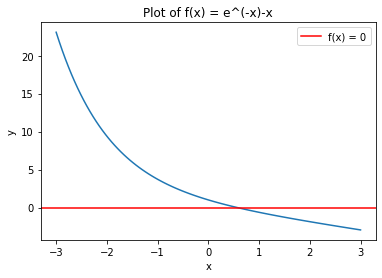

In [54]:
import math

def f(x): return math.exp(-x)-x
def df(x): return -math.exp(-x)-1

x = np.linspace(-3, 3, 100)
y = np.array([f(z) for z in x])
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of f(x) = e^(-x)-x")
plt.axhline(0, color='red', label="f(x) = 0")
plt.legend()
plt.show()

From this plot, we will choose 1 as the starting point.

In [7]:
newton(f, df, 1, 10)

 k            xk                      f(xk)          
 0   1.000000000000000e+00   -6.321205588285577e-01  
 1   5.378828427399902e-01    4.610048629168972e-02  
 2   5.669869914054133e-01    2.449498638371628e-04  
 3   5.671432859891230e-01    6.927808993140161e-09  
 4   5.671432904097838e-01    0.000000000000000e+00  
 5   5.671432904097838e-01    0.000000000000000e+00  
 6   5.671432904097838e-01    0.000000000000000e+00  
 7   5.671432904097838e-01    0.000000000000000e+00  
 8   5.671432904097838e-01    0.000000000000000e+00  
 9   5.671432904097838e-01    0.000000000000000e+00  


0.5671432904097838

In [9]:
e_0 = 6.321205588285577e-01  
e_1 = 4.610048629168972e-02  
e_2 = 2.449498638371628e-04  
e_3 = 6.927808993140161e-09  
# set up the array of error values
con_array = np.log(np.array([e_0, e_1, e_2, e_3]))
# fit a least squares regression line of e_n+1 ~ e_n
fit = np.polyfit(con_array[:-1], con_array[1:], deg=1) # x and y respectively
# the slope of the regression line for x and y
# highest power is first = slope
fit[0]

1.9998669255879264

Since the error $f(x_k) - 0 = f(x_k)$ approximately halves at each step, we estimate that the error of convergence is quadratic $m=2$. We confirm this above by running our convergence approximation code which uses log-least-squares fitting.

For the secant error, since the root appears to be between 0 and 1, we will choose these as our starting values.

In [10]:
secant(f, 0, 1, 10)

 k            xk                      f(xk)          
 0   1.000000000000000e+00   -6.321205588285577e-01  
 1   6.126998367802821e-01   -7.081394787317097e-02  
 2   5.638383891610742e-01    5.182354507338394e-03  
 3   5.671703584197446e-01   -4.241924243009176e-05  
 4   5.671433066049633e-01   -2.538016663500287e-08  
 5   5.671432904097046e-01    1.242339564555550e-13  
 6   5.671432904097838e-01    0.000000000000000e+00  
 7   5.671432904097838e-01    0.000000000000000e+00  
Secant method error: division by zero


0.5671432904097838

Since the error $f(x_k)$ decreases by approximately 1.5 times the previous error at each iteration, we estimate the order of convergence of the secant method to be 1.5. Again, we can confirm this with the convergence log-least-squares fitting, which reveals that the value is closer to 1.6:

In [11]:
e_0 = 6.321205588285577e-01  
e_1 = 7.081394787317097e-02  
e_2 = 5.182354507338394e-03  
e_3 = 4.241924243009176e-05  
e_4 = 2.538016663500287e-08  
e_5 = 1.242339564555550e-13   
# set up the array of error values
con_array = np.log(np.array([e_0, e_1, e_2, e_3, e_4, e_5]))
# fit a least squares regression line of e_n+1 ~ e_n
fit = np.polyfit(con_array[:-1], con_array[1:], deg=1) # x and y respectively
# the slope of the regression line for x and y
# highest power is first = slope
fit[0]

1.606229621379084

## Question 3
Run Newton’s method to find a root of $f(x) = x^4$ starting from $x = 1$. Estimate the order
of convergence and comment on the results.

In [53]:
def f(x): return x**4
def df(x): return 4*(x**3)

newton(f, df, 0.5, 20)

 k            xk                      f(xk)          
 0   5.000000000000000e-01    6.250000000000000e-02  
 1   3.750000000000000e-01    1.977539062500000e-02  
 2   2.812500000000000e-01    6.257057189941406e-03  
 3   2.109375000000000e-01    1.979772001504898e-03  
 4   1.582031250000000e-01    6.264122348511592e-04  
 5   1.186523437500000e-01    1.982007461833746e-04  
 6   8.898925781250000e-02    6.271195484708336e-05  
 7   6.674194335937500e-02    1.984245446333497e-05  
 8   5.005645751953125e-02    6.278276607539580e-06  
 9   3.754234313964844e-02    1.986485957854321e-06  
10   2.815675735473633e-02    6.285365726023435e-07  
11   2.111756801605225e-02    1.988728999249603e-07  
12   1.583817601203918e-02    6.292462849188196e-08  
13   1.187863200902939e-02    1.990974573375952e-08  
14   8.908974006772041e-03    6.299567986072350e-09  
15   6.681730505079031e-03    1.993222683093204e-09  
16   5.011297878809273e-03    6.306681145724592e-10  
17   3.758473409106955e-03  

0.0015856059694669966

In this case, it appears that the order of convergence is significantly less than 2. Using our convergence estimation method from above, we estimate that it the order of convergence is 1.

In [52]:
e_0 = 6.250000000000000e-02  
e_1 = 1.977539062500000e-02  
e_2 = 6.257057189941406e-03  
e_3 = 1.979772001504898e-03  
e_4 = 6.264122348511592e-04  
e_5 = 1.982007461833746e-04  
e_6 = 6.271195484708336e-05  
e_7 = 1.984245446333497e-05  
e_8 = 6.278276607539580e-06  
e_9 = 1.986485957854321e-06  
e_10 = 6.285365726023435e-07  
# set up the array of error values
con_array = np.log(np.array([e_0, e_1, e_2, e_3, e_4, e_5, e_6,
                             e_7, e_8, e_9, e_10]))
# fit a least squares regression line of e_n+1 ~ e_n
fit = np.polyfit(con_array[:-1], con_array[1:], deg=1) # x and y respectively
# the slope of the regression line for x and y
# highest power is first = slope
fit[0]

1.0000000000000002

## Question 4
Brent’s method does not require the derivative $f'(x)$. For $f(x) = e^{−x} − x$, how does it
compare to the secant method?

We call Brent's method on $f(x)=e^{-x}-x$:

In [55]:
import scipy.optimize as optimize

# set up function
def f(x): return math.exp(-x)-x
# find the root
sol = optimize.root_scalar(f, bracket=(-1, 1), method='brentq')
print("Root =", sol.root)
print ("Iterations:", sol.iterations)
print ("Function calls:", sol.function_calls)

Root = 0.567143290409784
Iterations: 7
Function calls: 8


The call to Brent's method used seven iterations of the algorithm, and called the function 8 times. This is comparable with the secant method, which required 7 iterations to reduce the error of the root down to $f(x)=0$ (in terms of machine number).

## Question 5
__PART A__ Make a plot of the function $f(x) = \cos\left(\frac{1}{x}\right)$ for $x \in [0.03, 0.2]$. You should see that $f(x)$ has many roots in this interval. What happens to $f(x)$ as $x \to 0$?

As $x\to 0$, we see that the frequency of the function increases. That is, it begins to cross the line $f(x)=0$ more and more frequently, increasing the number of roots in the region.

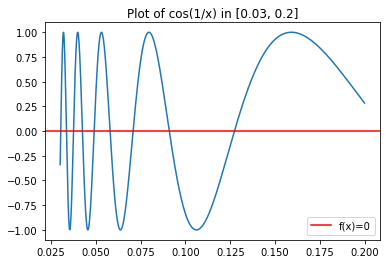

In [101]:
x = np.linspace(0.03, 0.2, 1000)
def f(x): return math.cos(1/x)
y = [f(z) for z in x]
plt.plot(x, y)
plt.title("Plot of cos(1/x) in [0.03, 0.2]")
plt.axhline(0, color="red", label="f(x)=0")
plt.legend()
plt.show()

__PART B__ Try running Newton’s method for this $f(x)$ with starting points $x_0 = 0.05, 0.06, . . . , 0.2$. What do you observe?

In [103]:
# define the derivative of cos(1/x)
def df(x): return math.sin(1/x)/x**2

# Newton's Method with x_0 = 0.05
newton(f, df, 0.05, 10)

 k            xk                      f(xk)          
 0   5.000000000000000e-02    4.080820618133920e-01  
 1   4.888251222762771e-02   -3.685312839673568e-02  
 2   4.897063263882934e-02   -4.965611485208414e-05  
 3   4.897075172029371e-02   -1.207079802873458e-10  
 4   4.897075172058318e-02    2.572377258846030e-15  
 5   4.897075172058318e-02   -9.803364199544708e-16  
 6   4.897075172058318e-02   -9.803364199544708e-16  
 7   4.897075172058318e-02   -9.803364199544708e-16  
 8   4.897075172058318e-02   -9.803364199544708e-16  
 9   4.897075172058318e-02   -9.803364199544708e-16  


0.048970751720583176

In [113]:
# repeated Newton's method with different x0
newton_roots = [] # instantiate roots array
x = np.linspace(0.05, 0.2, 19)
for x0 in x:
    newton_roots.append(newton(f, df, x0, 10, p=False))
newton_roots

[0.048970751720583176,
 0.05787452476068922,
 0.07073553026306459,
 0.07073553026306459,
 0.09094568176679733,
 0.09094568176679733,
 0.09094568176679733,
 0.2122065907891938,
 0.12732395447351627,
 0.12732395447351627,
 0.12732395447351627,
 0.12732395447351627,
 0.09094568176679733,
 -0.6366197723675814,
 0.2122065907891938,
 0.2122065907891938,
 0.2122065907891938,
 0.2122065907891938,
 0.2122065907891938]

We see that Newton's method gives us a different root depending on where we start the process (the value of $x_0$).

## Question 6
Implement the multidimensional version of Newton’s method from lectures and use it to
solve the above system of equations starting from $x_0 = (0.1, −1)$. Do you observe a quadratic local convergence rate? Hint: to measure the error, I suggest using $\sqrt{f_1(x_n)^2+f_2(x_n)^2}$, where $f_i$ are the two functions you wish to make zero.

The non-linear system we wish to solve is
$$
x_1+x_2-x_1x_2+2 = 0
$$
$$
x_1e^{-x_2}-1=0
$$

In [22]:
# define the function as a non-linear system
def f(x):
    return [x[0] + x[1] - x[0]*x[1] + 2,
            x[0]*math.exp(-x[1]) - 1]
# derivative of all functions with respect to x_1
def df_1(x): return np.array([1-x[1], math.exp(-x[1])])
# derivative of all functions with respect to x_2
def df_2(x): return np.array([1-x[0], -x[0]*math.exp(-x[1])])
# bundle these into gradient matrix
df = [df_1, df_2]

In [23]:
def newton_new_x(x, df, f):
    df_x1, df_x2 = df[0](x), df[1](x) # derivatives to put in Jacobian
    grad = jacobian(x)
    grad_inv = np.linalg.inv(grad)
    return np.transpose(x) - (grad_inv @ np.transpose(f(x)))

def jacobian(x):
    return np.transpose(np.array([df_1(x), df_2(x)]))

def calculate_error(f, x):
    return np.sqrt(f(x)[0]**2 + f(x)[1]**2)

In [34]:
np.sqrt(f([1, 2])[0]**2 + f([1, 2])[1]**2)

3.1221218862202527

In [46]:
def multi_newton(f, df, x0, n_iters, p=True):
    """
    Newton's method for multi-dimensional rootfinding.
    - The function f(x) is the one we want the root of
    - The vector df(x) is the derivatives f'(x) wrt x_1 and x_2 (shape=2x1)
    - x0 is the starting point
    - n_iters is the number of iterations to run
    """
    x = x0 # initial estimate
    errors = []
    if p: print("{},        {},        {}".format("k", "xk", "Error"))
    for i in range(n_iters):
        if p: print("{},        {},        {}".format(i, x, calculate_error(f, x)))
        x = newton_new_x(x, df, f)
        errors.append(calculate_error(f, x))
    return x, errors

In [47]:
root, errors = multi_newton(f, df, [0.1, -1], 7)

k,        xk,        Error
0,        [0.1, -1],        1.4036503109027894
1,        [ 0.21008318 -2.57796262],        1.775372282191226
2,        [ 0.11766933 -2.37927567],        0.27110757556599074
3,        [ 0.09871225 -2.32748129],        0.012046639068560586
4,        [ 0.09777511 -2.32511085],        2.5684649777205224e-05
5,        [ 0.09777309 -2.32510588],        1.1521924153322465e-10
6,        [ 0.09777309 -2.32510588],        0.0


In [262]:
np.isclose(f(root), [0.0, 0.0])

array([ True,  True])

To see if we observe a quadratic convergence rate, we can reuse our code from above that fits a least-squares line:

In [42]:
# set up the array of error values
con_array = np.log(errors[:-2]) # remove the last two values (can't take log of 0)
# fit a least squares regression line of e_n+1 ~ e_n
fit = np.polyfit(con_array[:-1], con_array[1:], deg=1) # x and y respectively
# the slope of the regression line for x and y
# highest power is first = slope
fit[0]

1.9529579130682202

Thus, the order of convergence is close to 2, and is quadratic.

## Question 7
__PART A__ Implement a function `polyfit` which takes in a vector of $x$ values $(x_0,..., x_n)$ and $y$-values $(y_0,..., y_n)$ and returns the corresponding interpolating polynomial as a NumPy polynomial object (i.e. you should have return `np.poly1d(a)` as the last line of the function). You should do this by solving the corresponding Vandermonde system. 

In [13]:
def polyfit(x, y):
    vander = np.vander(x, increasing=True)
    a = list(np.linalg.inv(vander) @ y)[::-1]
    return np.poly1d(a)

__PART B__ Use your function to find the degree-10 polynomial interpolating $\sin(x)$ at $x = 0, 0.6, 1.2,..., 6$. 

In [14]:
x = np.linspace(0, 6, 11)
y = np.sin(x)
p = polyfit(x, y)
p

poly1d([-3.34568333e-08, -1.27253777e-06,  5.13729691e-05, -5.18769514e-04,
        1.20748275e-03,  5.43100711e-03,  4.44155295e-03, -1.70805212e-01,
        2.10279653e-03,  9.99564647e-01,  0.00000000e+00])

__PART C__ Make a plot of your interpolant and $\sin(x)$ over $x \in [−2, 9]$ and comment on the quality of the fit. 

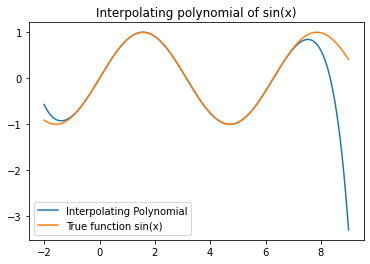

In [15]:
t = np.linspace(-2, 9, 1000)
interps = p(t)
true = np.sin(t)
plt.plot(t, interps, label="Interpolating Polynomial")
plt.plot(t, true, label="True function sin(x)")
plt.title("Interpolating polynomial of sin(x)")
plt.legend()
plt.show()

The interpolating polynomial fits the true function $\sin(x)$ incredibly well in the middle of the range. In fact, the two are indistinguishable to the naked eye in this plot. However, at the endpoints the interpolating polynomial differs considerably from the true function. This is a result of only fitting the function to values in the range $[0, 6]$, whereas we are plotting it in a larger range. 

## Question 8
Using 11 equally spaced nodes in $[−1, 1]$, find the polynomial interpolant for Runge’s
function 
$$
f(x) = \frac{1}{1+25x^2}
$$
Make a graph of the true $f(x)$ and the interpolant $p(x)$ and comment on what you see.

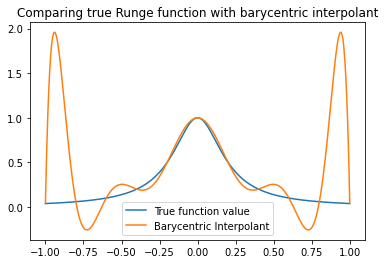

In [65]:
import scipy.interpolate as interpolate

# define runge's function
def runge(x): return 1/(1+25*x**2)
# select interpolation nodes
x = np.linspace(-1, 1, 11) # equally spaced nodes
fx = runge(x) # evaluate runge's function at each node
# build interpolant for data (x, fx)
p = interpolate.BarycentricInterpolator(x, fx)
# plot the interpolant and the true function
t = np.linspace(-1, 1, 1000)
true = runge(t)
interp = p(t)
plt.plot(t, true, label="True function value")
plt.plot(t, interp, label="Barycentric Interpolant")
plt.legend()
plt.title("Comparing true Runge function with barycentric interpolant")
plt.show()

As we can see from the plot, the Barycentric interpolant did not work well near the endpoints $\pm 1$. This occurs for two reasons:
1. The higher-order derivatives of the function are large at the endpoints. 
2. The part of the error term $\Pi^n_{i=0} (x-x_i)$ also becomes large near the endpoints.
This leads to the huge deviations from the true function around $\pm 1$.

## Question 9
Repeat the above experiment using Chebyshev points (i.e. interpolate Runge’s function at
$n + 1$ Chebyshev points for $n = 10$). Plot the true $f(x)$ and your new interpolant $p(x)$ and compare to your previous result.

In [17]:
def chebyshev_points(n):
    '''
    Returns a vector of the Chebyshev points for interpolation to polynomials of degree n
    The vector has length n+1.
    '''
    points = []
    for i in range(n+1):
        points.append(math.cos(math.pi*(2*i+1)/(2*n+2)))
    return np.array(points)

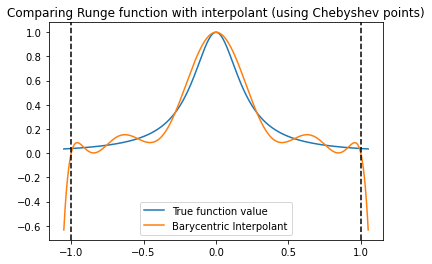

In [63]:
# select interpolation nodes
x = chebyshev_points(10) # equally spaced nodes
fx = runge(x) # evaluate runge's function at each node
# build interpolant for data (x, fx)
p = interpolate.BarycentricInterpolator(x, fx)
# plot the interpolant and the true function
t = np.linspace(-1.05, 1.05, 1000)
true = runge(t)
interp = p(t)
plt.plot(t, true, label="True function value")
plt.plot(t, interp, label="Barycentric Interpolant")
plt.axvline(x = -1, color = 'black', linestyle = '--')
plt.axvline(x = 1, color = 'black', linestyle = '--')
plt.legend()
plt.title("Comparing Runge function with interpolant (using Chebyshev points)")
plt.show()

## Question 10
Repeat the above experiment using 11 equally spaced points in $[−1, 1]$ and a cubic spline
with “not-a-knot” extra conditions. Plot $f(x)$ and your new interpolant and compare to your result for polynomial interpolation with equally spaced points.

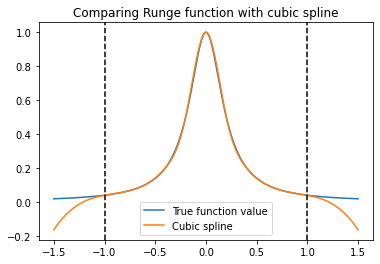

In [58]:
from scipy.interpolate import CubicSpline
%matplotlib inline

# select interpolation nodes
x = np.linspace(-1, 1, 11) # equally spaced nodes
fx = runge(x) # evaluate runge's function at each node
# build interpolant for data (x, fx)
p = CubicSpline(x, fx, bc_type='not-a-knot')
# plot the interpolant and the true function
t = np.linspace(-1.5, 1.5, 1000)
true = runge(t)
interp = p(t)
plt.plot(t, true, label="True function value")
plt.plot(t, interp, label="Cubic spline")
plt.legend()
plt.axvline(x = -1, color = 'black', linestyle = '--')
plt.axvline(x = 1, color = 'black', linestyle = '--')
plt.title("Comparing Runge function with cubic spline")
plt.show()

The cubic spline much better interpolates the data with evenly spaced points than a barycentric interpolant. The error between the spline and the function also increases much more slowly outside the original interpolation range than the barycentric polynomial.